In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from wrangle import wrangle_telco
import split_scale as ss
import explore as ex

In [2]:
df = wrangle_telco()
df

/Users/alechartman/codeup-data-science/ds-methodologies-exercises/regression/wrangle.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_charges"] = df.total_charges.astype("float")


,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.80
2,0016-QLJIS,90.45,65,5957.90
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75
...,...,...,...,...
1690,9964-WBQDJ,24.40,71,1725.40
1691,9972-EWRJS,19.25,67,1372.90
1692,9975-GPKZU,19.75,46,856.50
1693,9993-LHIEB,67.85,67,4627.65


In [3]:
train, test = ss.split_my_data(df, .8, 56)

In [4]:
train.shape

(1348, 4)

In [5]:
train.head()

,customer_id,monthly_charges,tenure,total_charges
893,5377-NDTOU,91.05,71,6293.75
324,2007-QVGAW,19.35,68,1292.65
1237,7337-CINUD,19.50,8,159.35
421,2533-QVMSK,94.10,61,5638.30
793,4878-BUNFV,20.70,42,828.85


In [6]:
test.head()

,customer_id,monthly_charges,tenure,total_charges
1663,9802-CAQUT,109.55,72,7887.25
1403,8232-UTFOZ,19.95,69,1399.35
778,4807-IZYOZ,20.65,51,1020.75
939,5702-KVQRD,82.55,71,5832.65
1150,6867-ACCZI,52.50,24,1208.15


In [7]:
train.shape[0] / df.shape[0]

0.8

In [8]:
test.shape[0] / df.shape[0]

0.2

---
1. Write a function, plot_variable_pairs(dataframe) that plots all of the pairwise relationships along with the regression line for each pair.

In [9]:
# def plot_variable_pairs(dataframe):
#     pairplot = sns.pairplot(dataframe, kind="reg")
#     plt.show()
#     return pairplot

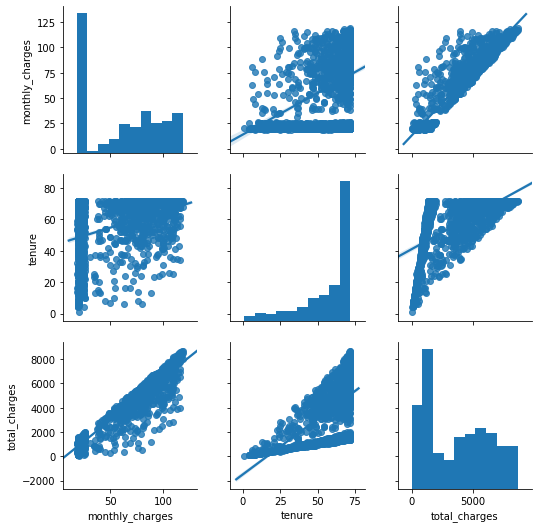

In [10]:
ex.plot_variable_pairs(train)

---
2. Write a function, months_to_years(tenure_months, df) that returns your dataframe with a new feature tenure_years, in complete years as a customer.

In [11]:
# df["tenure_years"] = (df.tenure / 12).round()
# df

In [12]:
# def months_to_years(tenure_months, df):
#     df["tenure_years"] = (df.tenure / 12).round().astype("int")
#     return df

In [13]:
train = ex.months_to_years(train["tenure"], train)

/Users/alechartman/codeup-data-science/ds-methodologies-exercises/regression/explore.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tenure_years"] = (df.tenure / 12).round().astype("int")


In [14]:
train.shape

(1348, 5)

In [15]:
train

,customer_id,monthly_charges,tenure,total_charges,tenure_years
893,5377-NDTOU,91.05,71,6293.75,6
324,2007-QVGAW,19.35,68,1292.65,6
1237,7337-CINUD,19.50,8,159.35,1
421,2533-QVMSK,94.10,61,5638.30,5
793,4878-BUNFV,20.70,42,828.85,4
...,...,...,...,...,...
1268,7560-QJAVJ,79.60,70,5589.45,6
1452,8577-QSOCG,20.20,38,746.05,3
1225,7268-WNTCP,20.45,62,1297.35,5
400,2400-XIWIO,90.10,71,6310.90,6


In [16]:
train["tenure_years_bins"] = pd.cut(train["tenure_years"], bins=3, labels=["2 or fewer", "2 to 4", "4 to 6"])
train

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,customer_id,monthly_charges,tenure,total_charges,tenure_years,tenure_years_bins
893,5377-NDTOU,91.05,71,6293.75,6,4 to 6
324,2007-QVGAW,19.35,68,1292.65,6,4 to 6
1237,7337-CINUD,19.50,8,159.35,1,2 or fewer
421,2533-QVMSK,94.10,61,5638.30,5,4 to 6
793,4878-BUNFV,20.70,42,828.85,4,2 to 4
...,...,...,...,...,...,...
1268,7560-QJAVJ,79.60,70,5589.45,6,4 to 6
1452,8577-QSOCG,20.20,38,746.05,3,2 to 4
1225,7268-WNTCP,20.45,62,1297.35,5,4 to 6
400,2400-XIWIO,90.10,71,6310.90,6,4 to 6


---
3. Write a function, plot_categorical_and_continous_vars(categorical_var, continuous_var, df), that outputs 3 different plots for plotting a categorical variable with a continuous variable, e.g. tenure_years with total_charges. For ideas on effective ways to visualize categorical with continuous: https://datavizcatalogue.com/. You can then look into seaborn and matplotlib documentation for ways to create plots.

In [17]:
# def plot_categorical_and_continous_vars(categorical_var, continuous_var, df):
#     plt.figure(figsize=(32, 18))
    
#     plt.subplot(221)
#     barplot = sns.barplot(x=categorical_var, y=continuous_var, data=df, palette=sns.color_palette("colorblind"))
#     plt.xlabel("Years")
#     plt.ylabel("Dollars")
#     plt.title("Total Charges in Dollars by Tenure in Years")
#     plt.show()
    
#     plt.figure(figsize=(32, 18))
    
#     plt.subplot(222)
#     boxplot = sns.boxplot(x=categorical_var, y=continuous_var, data=df, palette=sns.color_palette("colorblind"))
#     plt.xlabel("Years")
#     plt.ylabel("Dollars")
#     plt.title("Total Charges in Dollars by Tenure in Years")
#     plt.show()
    
#     plt.figure(figsize=(32, 18))
    
#     plt.subplot(223)
#     swarmplot = sns.swarmplot(x=categorical_var, y=continuous_var, data=df, palette=sns.color_palette("colorblind"))
#     plt.xlabel("Years")
#     plt.ylabel("Dollars")
#     plt.title("Total Charges in Dollars by Tenure in Years")
#     plt.show()

#     return barplot, boxplot, swarmplot

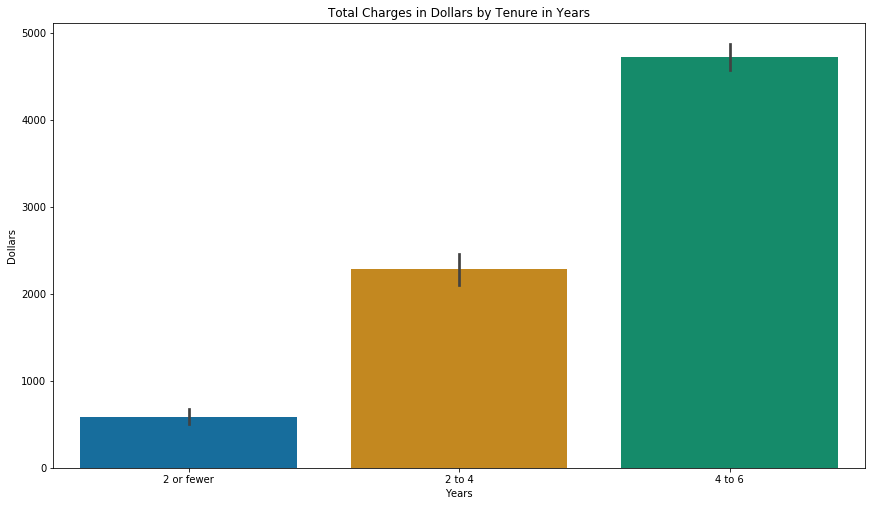

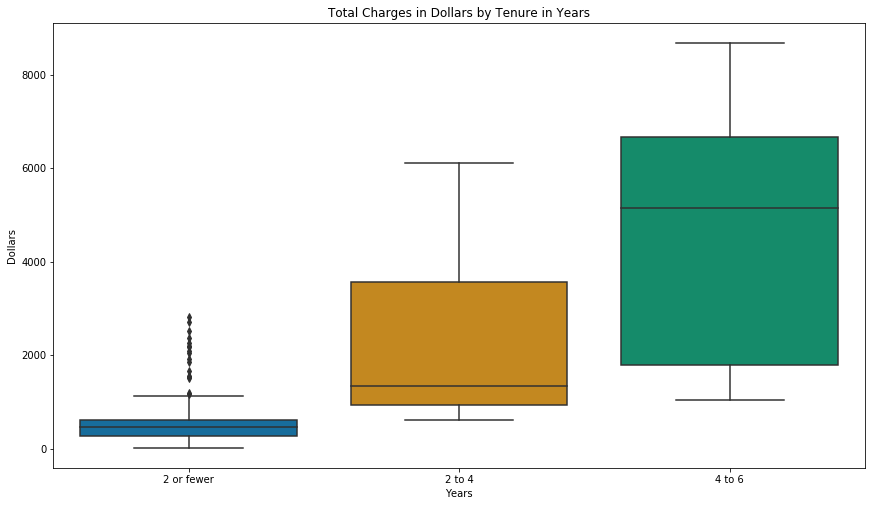

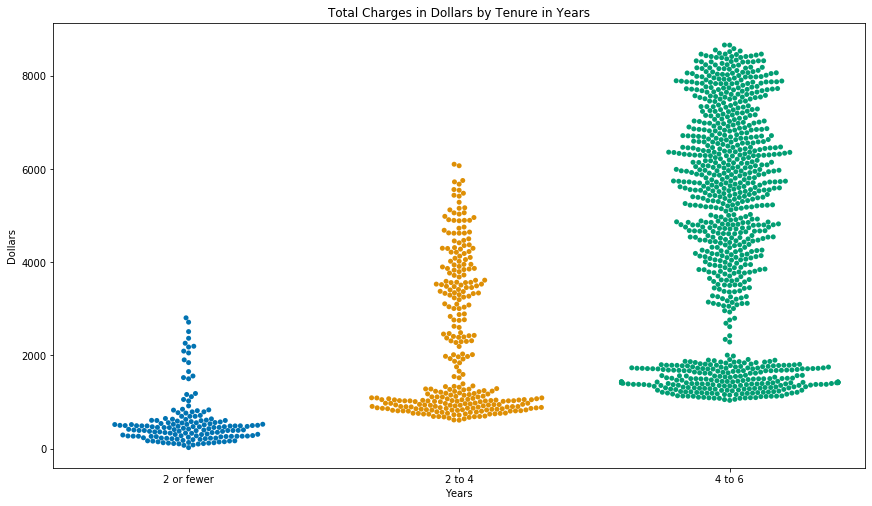

(<matplotlib.axes._subplots.AxesSubplot at 0x1315aaed0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1315dd710>)

In [18]:
ex.plot_categorical_and_continous_vars(train["tenure_years_bins"], train["total_charges"], train)

In [19]:
# plt.figure(figsize=(10, 6))

# sns.barplot(x=train["tenure_years"], y=train["total_charges"], palette=sns.color_palette("colorblind"))
# plt.xlabel("Years")
# plt.ylabel("Dollars")
# plt.title("Total Charges in Dollars by Tenure in Years")
# plt.show()